In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\VISHNU\fraud-detection-mlops\data\creditcard.csv")

# Show first few rows
print(df.head())

# Check column info and missing values
print(df.info())
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Check class distribution
class_counts = df["Class"].value_counts()
print("\nClass distribution:")
print(class_counts)



   Unnamed: 0  Time        V1        V2        V3        V4        V5  \
0           0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1           1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018   
2           2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3           3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4           4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8  ...       V28  Amount  Class  Hour  Day  \
0  0.462388  0.239599  0.098698  ... -0.021053  149.62      0   0.0  0.0   
1 -0.082361 -0.078803  0.085102  ...  0.014724    2.69      0   0.0  0.0   
2  1.800499  0.791461  0.247676  ... -0.059752  378.66      0   0.0  0.0   
3  1.247203  0.237609  0.377436  ...  0.061458  123.50      0   0.0  0.0   
4  0.095921  0.592941 -0.270533  ...  0.215153   69.99      0   0.0  0.0   

   UserID  UserTxnCount  UserAmountMean  UserAmountStd  TimeSinceLastTxn  
0       0             0      

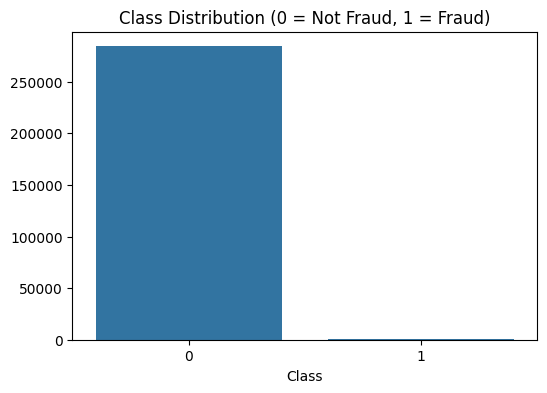

In [5]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution (0 = Not Fraud, 1 = Fraud)')
plt.show()


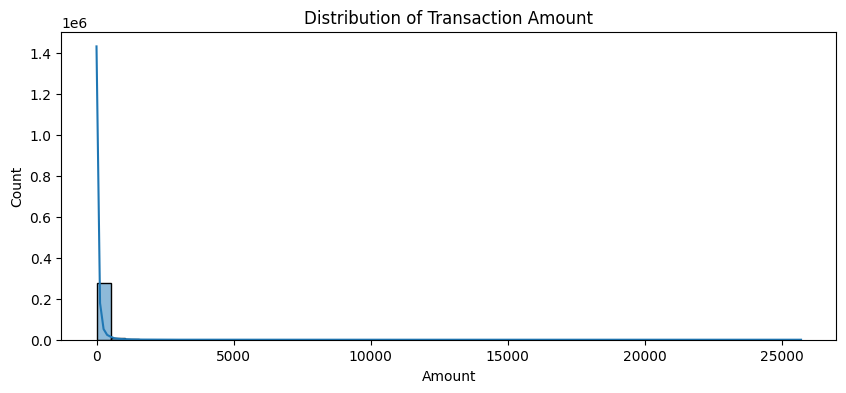

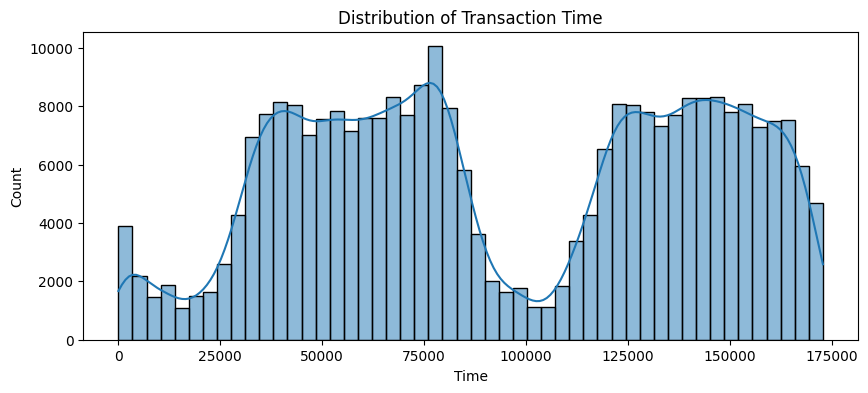

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transaction Amount Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

# Transaction Time Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.show()


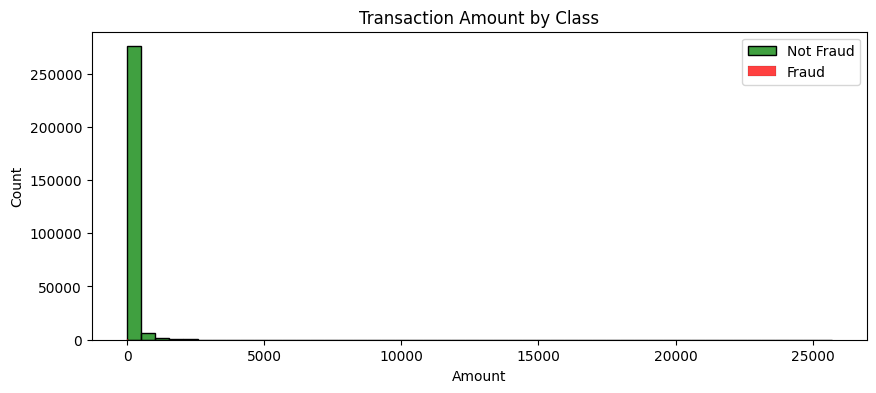

In [7]:
plt.figure(figsize=(10,4))
sns.histplot(df[df["Class"] == 0]["Amount"], color='green', label='Not Fraud', bins=50)
sns.histplot(df[df["Class"] == 1]["Amount"], color='red', label='Fraud', bins=50)
plt.legend()
plt.title('Transaction Amount by Class')
plt.show()


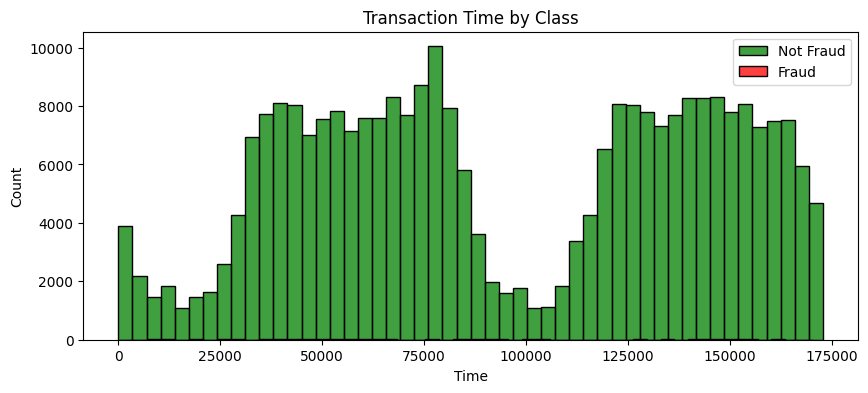

In [8]:
plt.figure(figsize=(10,4))
sns.histplot(df[df["Class"] == 0]["Time"], color='green', label='Not Fraud', bins=50)
sns.histplot(df[df["Class"] == 1]["Time"], color='red', label='Fraud', bins=50)
plt.legend()
plt.title('Transaction Time by Class')
plt.show()


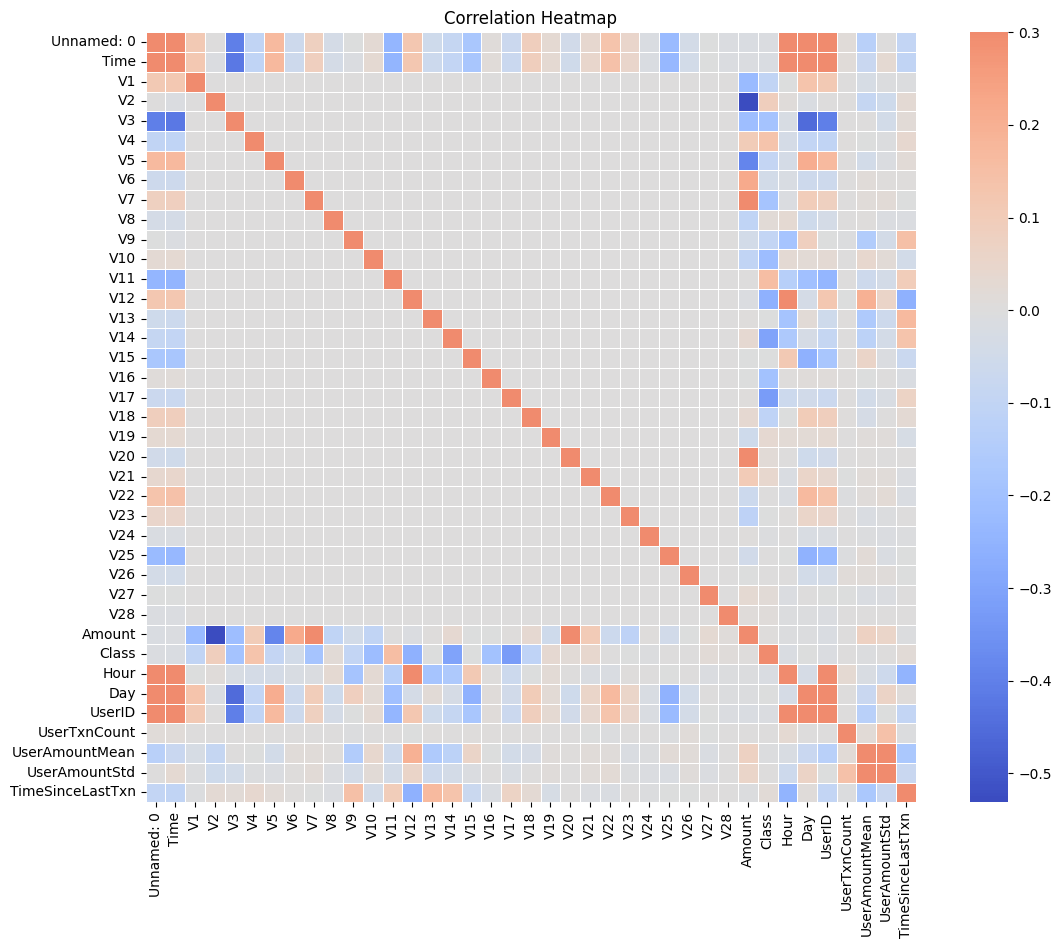

Class               1.000000
V11                 0.154876
V4                  0.133447
V2                  0.091289
V21                 0.040413
V19                 0.034783
V20                 0.020090
V8                  0.019875
TimeSinceLastTxn    0.018990
V27                 0.017580
V28                 0.009536
Amount              0.005632
V26                 0.004455
V25                 0.003308
UserTxnCount        0.001126
V22                 0.000805
UserAmountStd      -0.000509
V23                -0.002685
V15                -0.004223
V13                -0.004570
Day                -0.005223
UserAmountMean     -0.005332
V24                -0.007221
Unnamed: 0         -0.011692
UserID             -0.011713
Time               -0.012323
Hour               -0.017109
V6                 -0.043643
V5                 -0.094974
V9                 -0.097733
V1                 -0.101347
V18                -0.111485
V7                 -0.187257
V3                 -0.192961
V16           

In [9]:
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Let's see top features correlated with 'Class'
print(corr['Class'].sort_values(ascending=False))


In [10]:
print("Average Transaction Amount (Fraud):", df[df['Class'] == 1]['Amount'].mean())
print("Average Transaction Amount (Non-Fraud):", df[df['Class'] == 0]['Amount'].mean())


Average Transaction Amount (Fraud): 122.21132113821139
Average Transaction Amount (Non-Fraud): 88.29102242231328


In [11]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Stratify = y makes sure you keep the imbalance ratio in both splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train samples:", len(X_train), "Fraud cases:", sum(y_train))
print("Test samples:", len(X_test), "Fraud cases:", sum(y_test))


Train samples: 227845 Fraud cases: 394
Test samples: 56962 Fraud cases: 98


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE - Train samples:", len(X_train_res), "Fraud cases:", sum(y_train_res))


After SMOTE - Train samples: 454902 Fraud cases: 227451


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train_res_scaled, y_train_res)
y_pred_proba = lr.predict_proba(X_test_scaled)[:,1]
y_pred = lr.predict(X_test_scaled)


ROC-AUC score: 0.9767702997771984
Confusion Matrix:
 [[56266   598]
 [   10    88]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



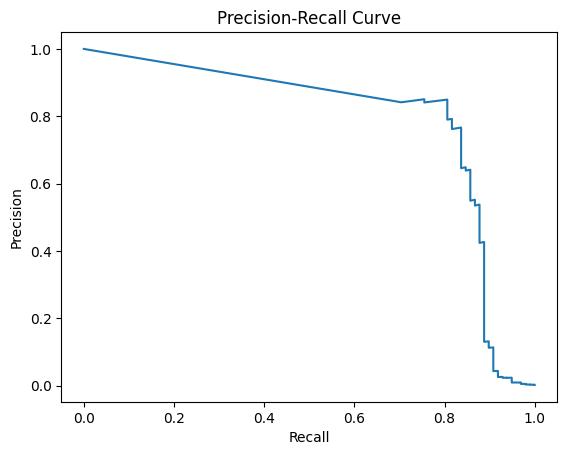

Average Precision Score: 0.7352331394496924


In [14]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, precision_recall_curve, average_precision_score

print("ROC-AUC score:", roc_auc_score(y_test, y_pred_proba))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Plot Precision-Recall Curve (important for imbalanced problems)
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
print("Average Precision Score:", average_precision_score(y_test, y_pred_proba))


In [15]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_res, y_train_res)

y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_proba_xgb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification report:\n", classification_report(y_test, y_pred_xgb))


C:\Users\VISHNU\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:42:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost ROC-AUC: 0.9790213743066163
Confusion matrix:
 [[56844    20]
 [   16    82]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



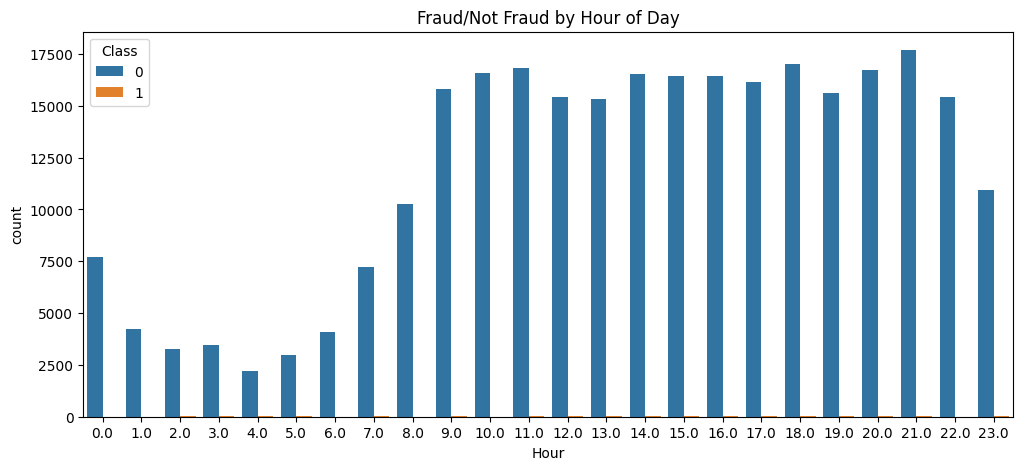

In [16]:
# Add feature: 'Hour of Day'
df['Hour'] = (df['Time'] // 3600) % 24
# Add feature: 'Day' (approximate, since it's seconds)
df['Day'] = df['Time'] // (3600*24)

# Visualize if fraud occurrences vary by hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(x='Hour', hue='Class', data=df)
plt.title('Fraud/Not Fraud by Hour of Day')
plt.show()


In [17]:
# 'SyntheticUserID': Assign each 5000 rows to the same "user" (for demo)
df['UserID'] = df.index // 5000

# For each user, add count of transactions and standard deviation of amounts up to that transaction
df['UserTxnCount'] = df.groupby('UserID').cumcount()
df['UserAmountMean'] = df.groupby('UserID')['Amount'].transform(lambda x: x.expanding().mean())
df['UserAmountStd'] = df.groupby('UserID')['Amount'].transform(lambda x: x.expanding().std().fillna(0))

# Drop if you’re uncomfortable with synthetic features, but this is good engineering demo!


In [18]:
# Assuming transactions are sorted by Time for each "user"
df = df.sort_values(['UserID', 'Time'])
df['TimeSinceLastTxn'] = df.groupby('UserID')['Time'].diff().fillna(0)


In [19]:
features = [c for c in df.columns if c not in ['Class', 'Time', 'UserID']]
X = df[features]
y = df['Class']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE - Train samples:", len(X_train_res), "Fraud cases:", sum(y_train_res))


After SMOTE - Train samples: 454902 Fraud cases: 227451


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 8],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.7, 1.0]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
search = RandomizedSearchCV(xgb_clf, param_grid, scoring='roc_auc', n_iter=5, cv=3, random_state=42, verbose=1)
search.fit(X_train_res, y_train_res)
print("Best params:", search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
best_model = search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred = best_model.predict(X_test)

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import shap
explainer = shap.Explainer(best_model, X_train_res, feature_names=features)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features)

In [ ]:
import joblib
joblib.dump(best_model, "models/fraud_xgb.joblib")


In [ ]:
joblib.dump(scaler, "models/scaler.joblib")


In [ ]:
from fastapi import FastAPI
import joblib
import pandas as pd

model = joblib.load("models/fraud_xgb.joblib")
scaler = joblib.load("models/scaler.joblib")

app = FastAPI()

@app.post("/predict")
def predict(input_data: dict):
    df = pd.DataFrame([input_data])
    # If you used a scaler: df = scaler.transform(df)
    proba = model.predict_proba(df)[:, 1][0]
    label = int(proba > 0.5)
    return {"fraud_probability": float(proba), "fraud_prediction": label}



In [ ]:
X_test

In [ ]:
print(X_test.iloc[0].to_dict())


In [ ]:
import requests

sample = X_test.iloc[5000].to_dict()
response = requests.post("http://127.0.0.1:8000/predict", json=sample)
print(response.json())


In [48]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,Class,Hour,Day,UserID,UserTxnCount,UserAmountMean,UserAmountStd,TimeSinceLastTxn
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,149.62,0,0.0,0.0,0,0,149.620000,0.000000,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,2.69,0,0.0,0.0,0,1,76.155000,103.895199,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.059752,378.66,0,0.0,0.0,0,2,176.990000,189.473475,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,123.50,0,0.0,0.0,0,3,163.617500,156.999237,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,69.99,0,0.0,0.0,0,4,144.892000,142.266623,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.823731,0.77,0,23.0,1.0,56,4802,68.963796,237.938397,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.053527,24.79,0,23.0,1.0,56,4803,68.954600,237.914480,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.026561,67.88,0,23.0,1.0,56,4804,68.954377,237.889717,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.104533,10.00,0,23.0,1.0,56,4805,68.942110,237.866482,0.0


In [49]:
df.to_csv("creditcard.csv")


In [2]:
X_Test


NameError: name 'X_Test' is not defined